## <center>Ratings Prediction Proect</center>

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating.

#### Problem statement:
<b>We have to build an application which can predict the rating by seeing the review</b>


#### Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset:

In [2]:
df = pd.read_csv("C:/Users/Dell/Downloads/Rattings.csv")


df.head(10)

,Rattings,Review
0,4,Received this yesterday (04/03/2021). Prompt d...
1,1,Different charger was sent in the box by Amazo...
2,5,Amazing laptop.. I ordered this laptop on its ...
3,4,As soon as I found 11gen Gen i5 at ~62K I got ...
4,5,"I bought this a few days ago, and I am glad I ..."
5,1,Don't buy this lap ... Don't be fool .I spent...
6,1,It's too strange to see a brand new HP pavili...
7,5,Nice product. USB type C can be used for charg...
8,4,Laptop is good and Fast but the GHZ mentioned ...
9,5,11 Gen Laptop with 16GB RAM is a dream combina...


In [3]:
# Checking for the shape of the dataset

df.shape

(8643, 2)

- Our dataset contains 8665 rows and 2 columns.
- Ratings is the target column.


In [4]:
# Checking for the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8643 entries, 0 to 8642
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  8643 non-null   int64 
 1   Review    8642 non-null   object
dtypes: int64(1), object(1)
memory usage: 135.2+ KB


- Since our dataset have some rows containing 'No Rating' & 'No Review'. So, we'll remove those rows since they will not help us to make the model.

In [5]:
#Replacing the 'No Rating' to null values

df['Rattings'].replace({'No Rating':np.nan}, inplace=True)

#Replacing the 'No Review' to null values
df['Review'].replace({'No Review':np.nan}, inplace=True)

In [6]:
df.tail(10)

,Rattings,Review
8633,3,No charger in pack boxPlsSo what can I do
8634,1,Charging cable is missing in the box
8635,1,Not good mobile
8636,5,Nice product 👌
8637,3,Nice
8638,5,Good . But not better
8639,4,Good mobile
8640,1,Battery was tooo weak
8641,5,This is good product
8642,5,Goga


In [7]:
# Checking for the null values in the dataset
df.isnull().sum()

Rattings    0
Review      1
dtype: int64

- Our dataset contains null values.

In [8]:
# Removing the null values
df = df.dropna()

In [9]:
# Checking for the null values again

df.isnull().sum()

Rattings    0
Review      0
dtype: int64

In [10]:
#Checking for the shape of the dataset again
df.shape

(8642, 2)

In [11]:
# Checking for the info of the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8642 entries, 0 to 8642
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rattings  8642 non-null   int64 
 1   Review    8642 non-null   object
dtypes: int64(1), object(1)
memory usage: 202.5+ KB


In [12]:
# Changing the data type of column 'Ratings' to integer
df['Rattings'] = df['Rattings'].astype(float)
df['Rattings'] = df['Rattings'].astype(int)

In [13]:
# Checking for the value counts of the target column 'Ratings'

df['Rattings'].value_counts()

5    3185
1    2596
4    1473
3     828
2     560
Name: Rattings, dtype: int64

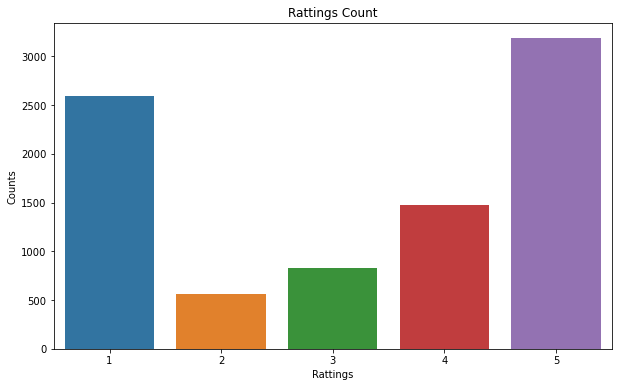

In [14]:
plt.figure(figsize=[10,6])
sns.countplot(df['Rattings'])
plt.title('Rattings Count')
plt.xlabel('Rattings')
plt.ylabel('Counts')
plt.show()

In [15]:
# Checking for the length of the reviews and creating a new column for the same.

df['length']=df.Review.str.len()
df.head()

,Rattings,Review,length
0,4,Received this yesterday (04/03/2021). Prompt d...,1661
1,1,Different charger was sent in the box by Amazo...,349
2,5,Amazing laptop.. I ordered this laptop on its ...,387
3,4,As soon as I found 11gen Gen i5 at ~62K I got ...,2470
4,5,"I bought this a few days ago, and I am glad I ...",2465


In [16]:
# Converting all the reviews to lower case

df['Review']=df['Review'].str.lower()

df.head()

,Rattings,Review,length
0,4,received this yesterday (04/03/2021). prompt d...,1661
1,1,different charger was sent in the box by amazo...,349
2,5,amazing laptop.. i ordered this laptop on its ...,387
3,4,as soon as i found 11gen gen i5 at ~62k i got ...,2470
4,5,"i bought this a few days ago, and i am glad i ...",2465


In [17]:
#Replacing email address with 'email'

df['Review']=df['Review'].str.replace(r'^.+@[^\.].*\[a-z]{2,}$','emailaddress')

#Replacing URLs with 'webaddress'
df['Review']=df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replacing money symbol with 'moneysymb'(£ can type with ALT key+156)
df['Review']=df['Review'].str.replace(r'£|\$','dollers')

#Replacing 10 digit phone number(format include paranthesis, space, no spaces,dashes) with 'phone number'
df['Review']=df['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#Replacing whitespace between terms with a single space
df['Review']=df['Review'].str.replace(r'\s+',' ')

#Replacing number with 'numbr'
df['Review']=df['Review'].str.replace(r'^\d+(\.\d+)?','numbr')

#Removing punctuation
df['Review']=df['Review'].str.replace(r'[^\w\d\s]',' ')

#Removing leading and trailing whitespace
df['Review']=df['Review'].str.replace(r'^\s+|\s+?$',' ')

df.head()

,Rattings,Review,length
0,4,received this yesterday 04 03 2021 prompt d...,1661
1,1,different charger was sent in the box by amazo...,349
2,5,amazing laptop i ordered this laptop on its ...,387
3,4,as soon as i found 11gen gen i5 at 62k i got ...,2470
4,5,i bought this a few days ago and i am glad i ...,2465


In [18]:
# Removing the stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['Review']=df['Review'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [19]:
#Checking for the length of the reviews after removing the stopwords

df['clean_length']=df.Review.str.len()
df.head()

,Rattings,Review,length,clean_length
0,4,received yesterday 04 03 2021 prompt delivery ...,1661,1133
1,1,different charger sent box amazon ready provid...,349,218
2,5,amazing laptop ordered laptop released date e ...,387,273
3,4,soon found 11gen gen i5 62k got stuck reading ...,2470,1696
4,5,bought days ago glad decided make purchase lap...,2465,1721


#### Tokenization

In [20]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')

df['Review']=df['Review'].apply(lambda x:tokenizer.tokenize(x.lower()))

#### Stemming & Lemmatizing

In [21]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text=[lemmatizer.lemmatize(i) for i in text]
    return lem_text

df['Review']=df['Review'].apply(lambda x : word_lemmatizer(x))

In [22]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

def word_stemmer(text):
    stem_text=" ".join([stemmer.stem(i) for i in text])
    return stem_text

df['Review']=df['Review'].apply(lambda x : word_stemmer(x))

Text(0.5, 1.0, 'Review length distribution graph')

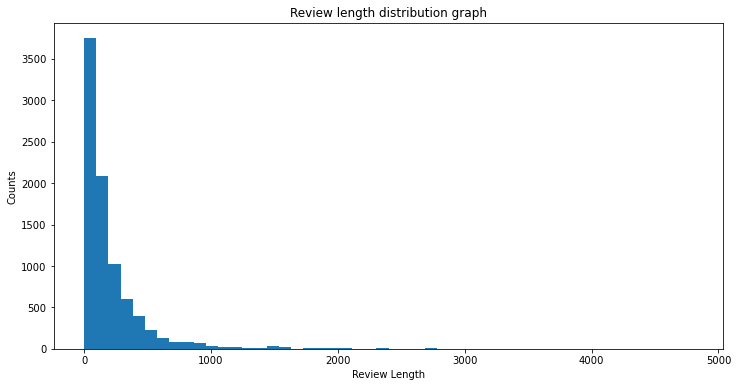

In [23]:
# Create and print a Reviews length distribution graph
review_length_distribution = pd.DataFrame(df["Review"].str.len())
review_length_distribution = review_length_distribution[review_length_distribution.Review < 5000]
review_length_distribution.groupby(["Review"])
review_length_distribution = review_length_distribution.plot(kind='hist', legend=None, bins=50, figsize=[12, 6])
review_length_distribution.set_xlabel("Review Length")
review_length_distribution.set_ylabel("Counts")
review_length_distribution.set_title("Review length distribution graph")

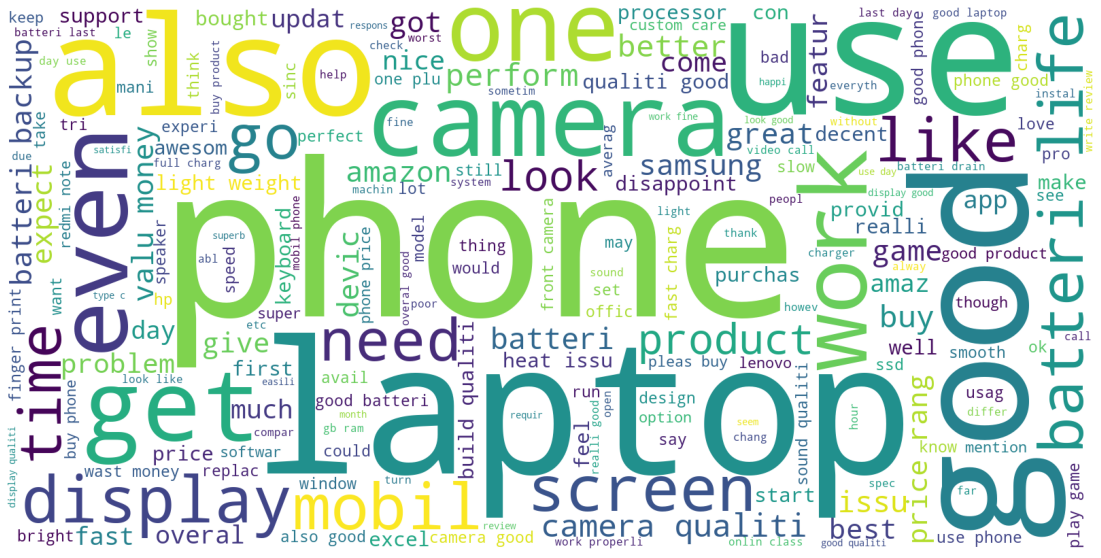

In [24]:
from wordcloud import WordCloud
# Create a long string of words.
word_string = ' '.join(df['Review'])

# Create word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=1600, height=800).generate(word_string)

plt.figure( figsize=(20,10), facecolor='white')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
#Converting text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['Review'])
x = features

In [26]:
y = df['Rattings']

In [27]:
# Creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.25)

In [28]:
# Creating empty list

Model = []
score = []
cv_score = []

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

#### 1. Logistic Regression model:

In [30]:
LR=LogisticRegression()
Model.append('LogisticRegression')
LR.fit(x_train,y_train)
print(LR)
pre=LR.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)

LogisticRegression()


Accuracy_score=  0.7311429893567792
Cross_val_score= 0.7070271164021164 



#### 2. KNeighborsClassifier:

In [31]:
KNN=KNeighborsClassifier(n_neighbors=6)

Model.append('KNeighborsClassifier')
KNN.fit(x_train,y_train)
print(KNN)

pre=KNN.predict(x_test)
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)

score.append(AS*100)
sc=cross_val_score(KNN,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc)
cv_score.append(sc*100)

KNeighborsClassifier(n_neighbors=6)
Accuracy_score=  0.5886163813049514
Cross_val_score= 0.5588119604566973


#### 3. DecisionTreeClassifier:

In [32]:
DT=DecisionTreeClassifier()
Model.append('DecisionTreeClassifier')
DT.fit(x_train,y_train)
print(DT)
pre=DT.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(DT,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)

DecisionTreeClassifier()


Accuracy_score=  0.7602961591855623
Cross_val_score= 0.7211598708309235 



#### 4. RandomForestClassifier:

In [33]:
RF = RandomForestClassifier()
Model.append('RandomForestClassifier')
RF.fit(x_train,y_train)
print(RF)
pre=RF.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')

cv_score.append(sc*100)

RandomForestClassifier()


Accuracy_score=  0.8037945395650162
Cross_val_score= 0.771257336717863 



In [34]:
#Calculating the difference between accuracy score and cross validation score
difference = list(np.array(score) - np.array(cv_score))

# Creating dataframe
result = pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv_score,
                       'Difference':difference})
result

,Model,Accuracy_score,Cross_val_score,Difference
0,LogisticRegression,73.114299,70.702712,2.411587
1,KNeighborsClassifier,58.861638,55.881196,2.980442
2,DecisionTreeClassifier,76.029616,72.115987,3.913629
3,RandomForestClassifier,80.379454,77.125734,3.253720


- From the above table, we found that the minimum difference between the accuracy score and cross validation score is for KNeighborsClassifier. <b>So, the best fit model for our project is KNeighborsClassifier.</b>

#### Hyperparameter tuning:

In [35]:
leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

#Using GridSearch
gsc = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fitting the model
best_model = gsc.fit(x_train,y_train)

#Printing the values of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


In [36]:
final_model = KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)

print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))

70.38408144377603
              precision    recall  f1-score   support

           1       0.91      0.60      0.72       663
           2       0.93      0.63      0.75       137
           3       0.92      0.54      0.68       203
           4       0.85      0.49      0.62       367
           5       0.57      0.94      0.71       791

    accuracy                           0.70      2161
   macro avg       0.84      0.64      0.70      2161
weighted avg       0.78      0.70      0.70      2161



- After <b>Hyper parameter tuning</b>, we got <b>75% accuracy score</b>.

In [37]:
# Saving the final model
import joblib
filename = 'ratings_prediction_project.pkl'
joblib.dump(final_model, open(filename, 'wb'))

#### Checking for the performance of our model:

In [38]:
x = 'Really very good product. Thank you for the fast delivery.'
test = tf_vec.transform([x])
final_model.predict(test)

array([4])

In [39]:
y = 'waste of money. very bad product.'
test2 = tf_vec.transform([y])
final_model.predict(test2)

array([1])